# Logistic Regression

## Importing the libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.svm import SVC

#Importing The Dataset
print(os.listdir("input"))
dim = 100

['fruits-360_dataset']


## This function collects images and their labels

In [2]:
def getYourFruits(fruits, data_type, print_n=False, k_fold=False):
    images = []
    labels = []
    val = ['Training', 'Test']
    if not k_fold:
        path = "input/*/fruits-360/" + data_type + "/"
        for i,f in enumerate(fruits):
            p = path + f
            j=0
            for image_path in glob.glob(os.path.join(p, "*.jpg")):
                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                image = cv2.resize(image, (dim, dim))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                images.append(image)
                if(f=='Banana'):
                    labels.append(0)
                else:
                    labels.append(1)
                j+=1
            if(print_n):
                print("There are " , j , " " , data_type.upper(), " images of " , fruits[i].upper())
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    else:
        for v in val:
            path = "input/*/fruits-360/" + v + "/"
            for i,f in enumerate(fruits):
                p = path + f
                j=0
                for image_path in glob.glob(os.path.join(p, "*.jpg")):
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                    image = cv2.resize(image, (dim, dim))
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    images.append(image)
                    if(f=='Banana'):
                        labels.append(0)
                    else:
                        labels.append(1)
                    j+=1
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    
def getAllFruits():
    fruits = []
    for fruit_path in glob.glob("input/*/fruits-360/Training/*"):
        fruit = fruit_path.split("/")[-1]
        fruits.append(fruit)
    return fruits

## Feature Scaling

In [3]:
# Select Fruits
fruits = ['Banana' , 'Peach' , 'Kiwi'] #Binary classification

#Get Images and Labels 
X_t, y_train =  getYourFruits(fruits, 'Training', print_n=True, k_fold=False)
X_test, y_test = getYourFruits(fruits, 'Test', print_n=True, k_fold=False)

#Get data for k-fold
# X,y = getYourFruits(fruits, '', print_n=True, k_fold=True)

#Scale Data Images
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X_t])
X_test = scaler.fit_transform([i.flatten() for i in X_test])
# X = scaler.fit_transform([i.flatten() for i in X])


There are  490   TRAINING  images of  BANANA
There are  492   TRAINING  images of  PEACH
There are  466   TRAINING  images of  KIWI
There are  166   TEST  images of  BANANA
There are  164   TEST  images of  PEACH
There are  156   TEST  images of  KIWI


In [4]:
X_train.shape

(1448, 30000)

In [5]:
X_test.shape

(486, 30000)

In [6]:
y_train.shape

(1448,)

In [7]:
y_test.shape

(486,)

## Function creates a grid display of images provided in a list, arranging them in a specified number of rows and columns.

In [8]:
def plot_image_grid(images, nb_rows, nb_cols, figsize=(15, 15)):
    assert len(images) == nb_rows*nb_cols, "Number of images should be the same as (nb_rows*nb_cols)"
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=figsize)
    
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].axis('off')
            axs[i, j].imshow(images[n])
            n += 1  

Banana


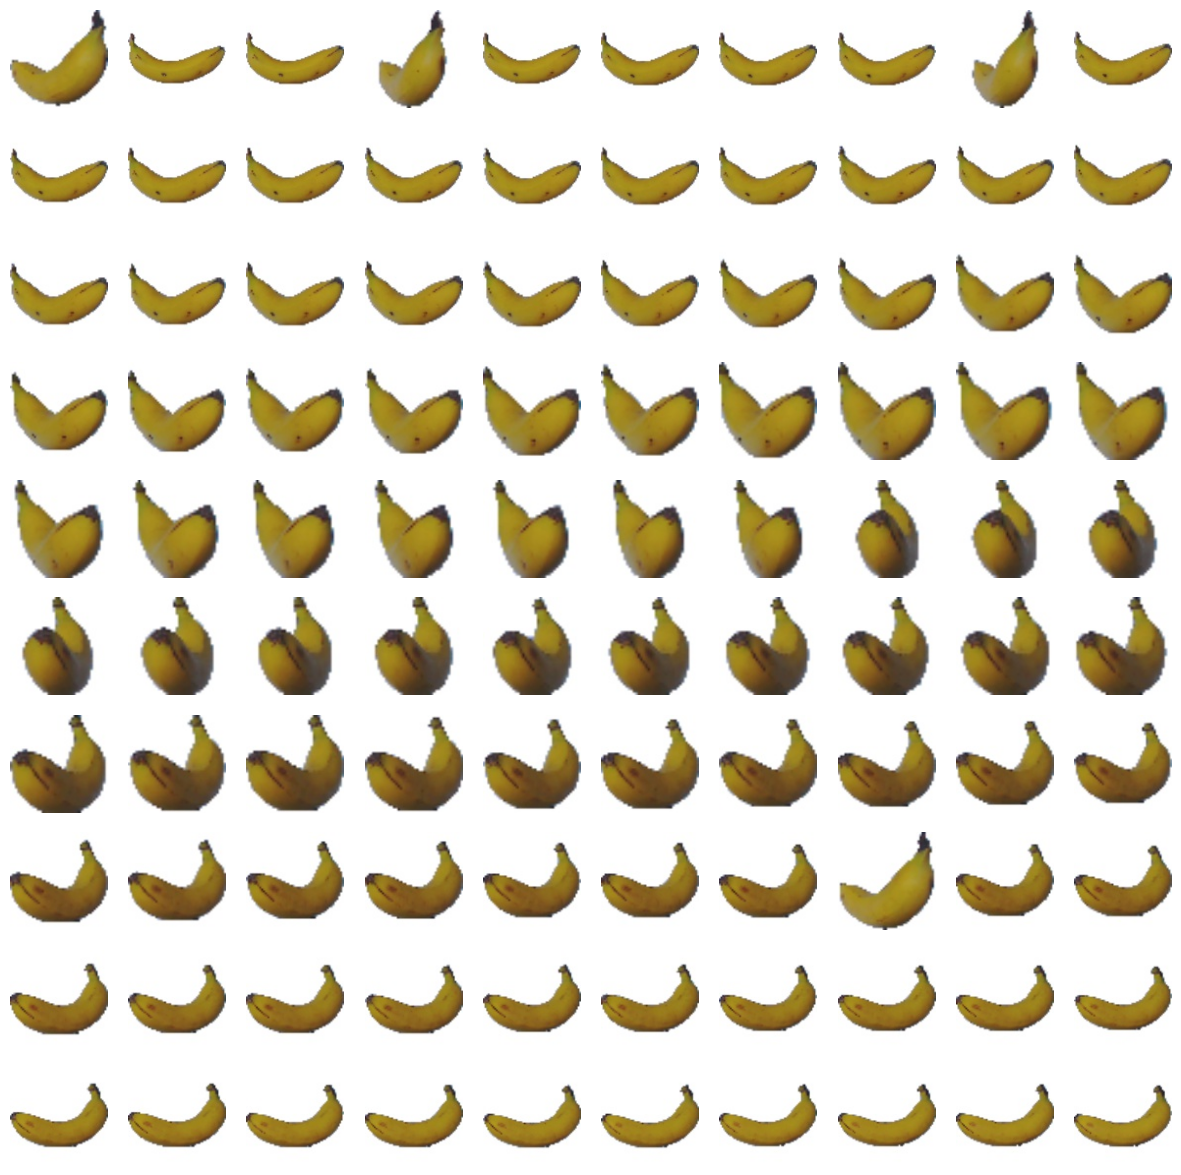

In [9]:
print(fruits[y_train[0]])
plot_image_grid(X_t[0:100], 10, 10)

Peach


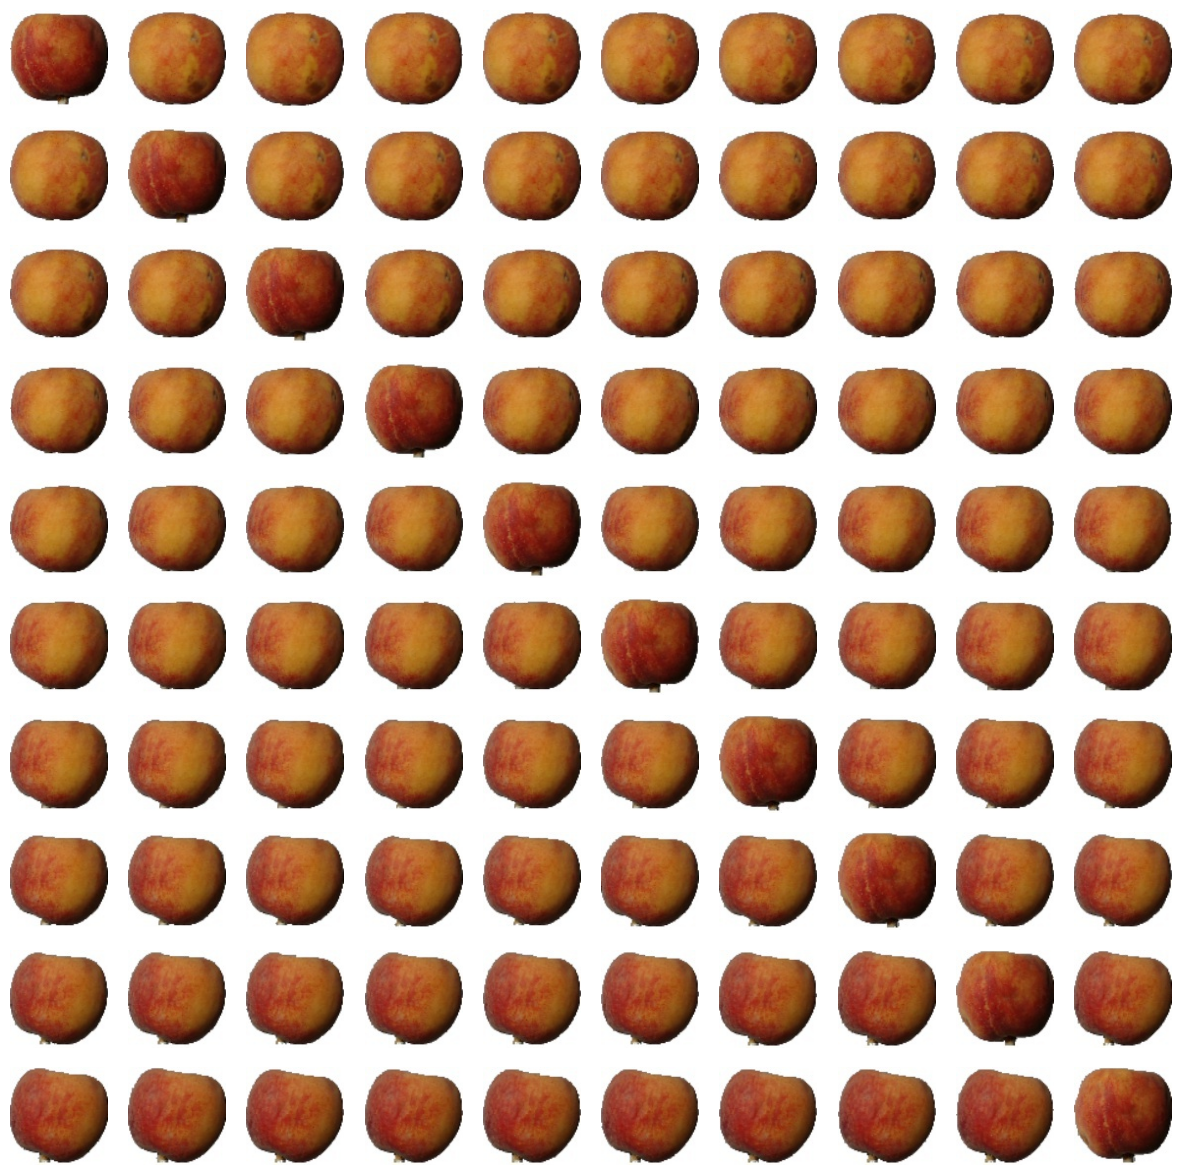

In [10]:
print(fruits[y_train[490]])
plot_image_grid(X_t[490:590], 10, 10)

## Training the Logistic Regression model on the Training set

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# calculate the FPR and TPR for all thresholds of the classification
probs = model.predict_proba(X_test)
probs = probs[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)
auc = metrics.roc_auc_score(y_test, probs)

## Calculate and print the accuracy

In [12]:
#Evaluation
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with Logistic: {0:.2f}%".format(precision))

Accuracy with Logistic: 100.00%


## ROC CURVE

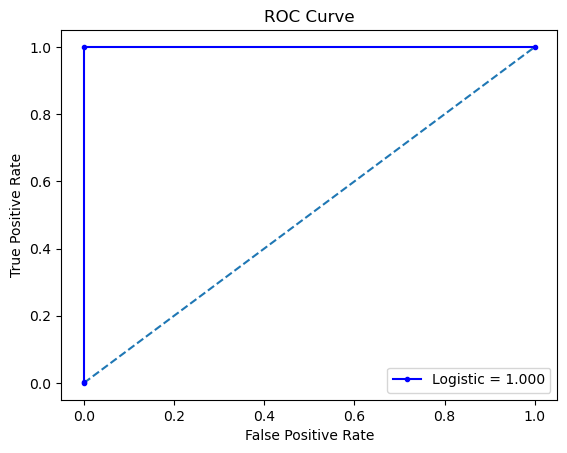

In [13]:
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, 'b', marker='.', label = 'Logistic = %0.3f' % auc )
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Making the Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[166,   0],
       [  0, 320]], dtype=int64)

In [15]:
c_df = pd.DataFrame(cm,[0,1],[0,1])
c_df

0    1
0  166    0
1    0  320